# More detailed analytics on cars and mpg

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random

## 1. Find out which manufacturer has best mileages

In [488]:
df = pd.read_csv("datasets/mpg.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
Unnamed: 0      234 non-null int64
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 22.0+ KB


In [489]:
df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [490]:
x = df["manufacturer"].unique()
x

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [491]:
df2 = pd.DataFrame(columns=["manufacturer","max"])   #Create a new dataframe to plot results
for car in x:
    max1 = 0
    for i in range(234):
        if df["manufacturer"].iloc[i] == car:
            if df["cty"].iloc[i] > max1:
                max1 = df["cty"].iloc[i]
                
    df2 = df2.append({"manufacturer":car, "max":max1},ignore_index=True)  #Referred to pandas docs for append syntax
                

In [492]:
df2.head()

,manufacturer,max
0,audi,21
1,chevrolet,22
2,dodge,18
3,ford,18
4,honda,28


KeyError: 'max'

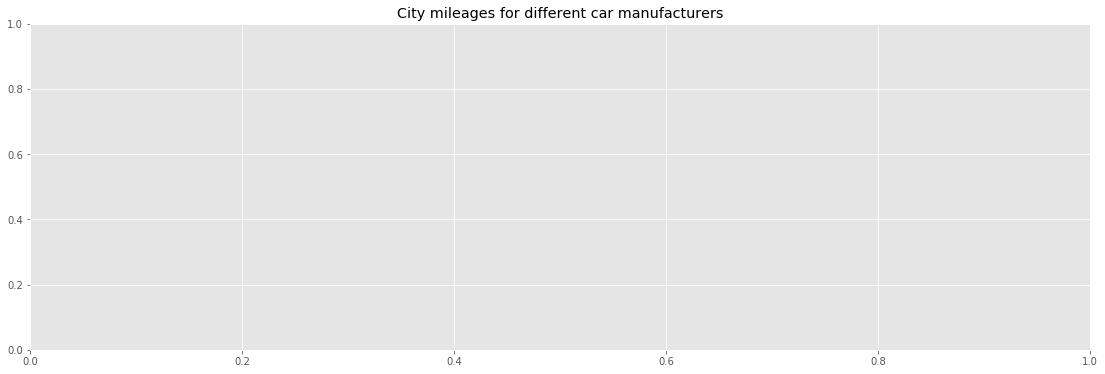

In [538]:
color = (np.random.random(),np.random.random(),np.random.random(),np.random.uniform(0.9,0.99))
plt.style.use("ggplot")
plt.figure(figsize=(19,6))
plt.title("City mileages for different car manufacturers")
plt.bar(x, df2["max"], color=color)
plt.show()

**We can observe that :**
* ***volkswagen* company cars give the highest city mileage of 35**
* ***landrover* and *lincoln* company cars give the worst city mileages, their highest being around 17.5**

## 2. Find out which model gives the best city and highway mileage

In [494]:
x = df["model"].unique()
print("Unique models : ", x)
df2 = pd.DataFrame(columns=["manufacturer","city max", "highway max"])
for car in x:
    maxCity = 0
    maxHighway = 0
    
    for i in range(234):
        if df["model"].iloc[i] == car:
            if df["cty"].iloc[i] > maxCity:
                maxCity = df["cty"].iloc[i]
                
    for i in range(234):
        if df["model"].iloc[i] == car:
            if df["hwy"].iloc[i] > maxHighway:
                maxHighway = df["hwy"].iloc[i]
                
    
    df2 = df2.append({"manufacturer":car, "city max":maxCity, "highway max":maxHighway},ignore_index=True)

Unique models :  ['a4' 'a4 quattro' 'a6 quattro' 'c1500 suburban 2wd' 'corvette'
 'k1500 tahoe 4wd' 'malibu' 'caravan 2wd' 'dakota pickup 4wd'
 'durango 4wd' 'ram 1500 pickup 4wd' 'expedition 2wd' 'explorer 4wd'
 'f150 pickup 4wd' 'mustang' 'civic' 'sonata' 'tiburon'
 'grand cherokee 4wd' 'range rover' 'navigator 2wd' 'mountaineer 4wd'
 'altima' 'maxima' 'pathfinder 4wd' 'grand prix' 'forester awd'
 'impreza awd' '4runner 4wd' 'camry' 'camry solara' 'corolla'
 'land cruiser wagon 4wd' 'toyota tacoma 4wd' 'gti' 'jetta' 'new beetle'
 'passat']


In [495]:
df2.head()

,manufacturer,city max,highway max
0,a4,21,31
1,a4 quattro,20,28
2,a6 quattro,17,25
3,c1500 suburban 2wd,14,20
4,corvette,16,26


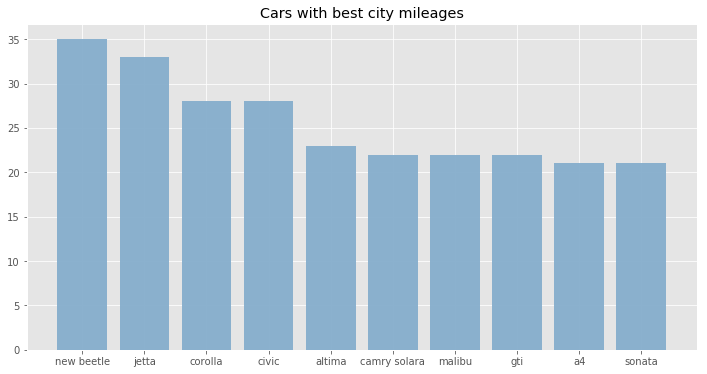

In [536]:
color = (np.random.random(),np.random.random(),np.random.random(),np.random.uniform(0.9,0.99))
plt.style.use("ggplot")
df2 = df2.sort_values(by=["city max"], ascending=False)    #Referred to pandas docs for sort_values syntax
dfTemp = df2[0:10]   #View only top 10 results

plt.figure(figsize=(12,6))
plt.title("Cars with best city mileages")
plt.bar(dfTemp["manufacturer"], dfTemp["city max"], color=color)
plt.show()

**We can see that *new beetle* has the highest city mileage of 35**

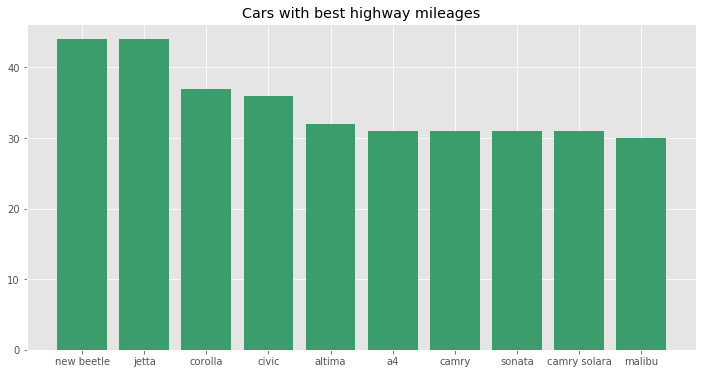

In [537]:
color = (np.random.uniform(),np.random.uniform(),np.random.uniform(),np.random.uniform(0.9,0.99))

df2 = df2.sort_values(by=["highway max"], ascending=False)
dfTemp = df2[0:10]
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
plt.title("Cars with best highway mileages")
plt.bar(dfTemp["manufacturer"], dfTemp["highway max"], color=color)
plt.show()

**We can observe that *new beetle* and *jetta* have the joint highest highway mileage of 44**

## 3. Find out which model gives best of both city and highway mileage combined

In [519]:
x = df["model"].unique()
dfTemp = pd.DataFrame(columns=["model", "combined mileage"])

for model in x:
    
    for i in range(234):
        
        if df["model"].iloc[i] == model:
            
            city = df["cty"].iloc[i]
            highway = df["hwy"].iloc[i]
            average = (city+highway)/2
            
        dfTemp = dfTemp.append({"model":model, "combined mileage":average},ignore_index=True)
            
    

In [520]:
dfTemp = dfTemp.sort_values(by="combined mileage", ascending = False)
dfTemp = dfTemp.drop_duplicates(keep="first")

In [521]:
dfTemp.head()

,model,combined mileage
8645,new beetle,39.5
8402,jetta,38.5
8646,new beetle,35.0
7450,corolla,32.5
7685,land cruiser wagon 4wd,30.5


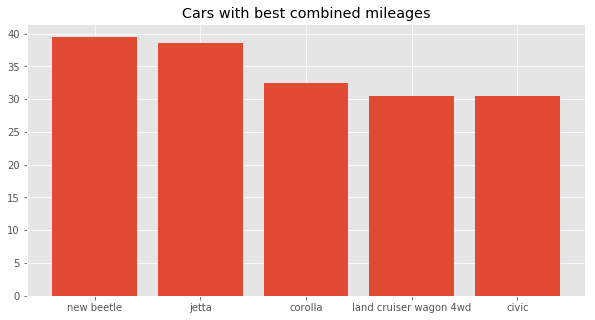

In [531]:
color = (np.random.uniform(),np.random.uniform(),np.random.uniform(),np.random.uniform(0.5,0.75))
plt.style.use("ggplot")

dfTemp2 = dfTemp[0:10]

plt.figure(figsize=(10,5))
plt.title("Cars with best combined mileages")
plt.bar(dfTemp2["model"], dfTemp2["combined mileage"])
plt.show()

***New Beetle* has the best combined mileage**

## 4. Find out differences between highway and city mileages

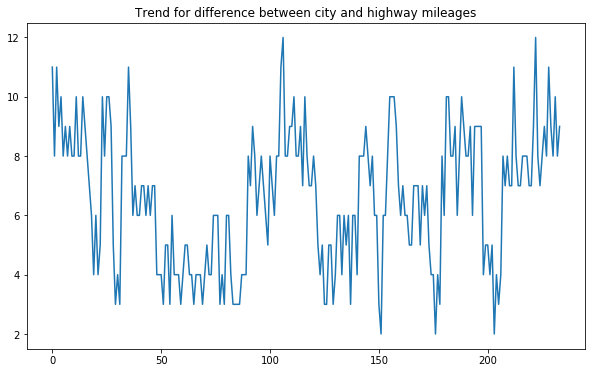

In [392]:
x = df["hwy"] - df["cty"]
x.plot(kind="line",figsize=(10,6),title="Trend for difference between city and highway mileages")

In [393]:
x.describe()

count    234.000000
mean       6.581197
std        2.262739
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       12.000000
dtype: float64

**Here we can see the trend of difference between city and higway mileage. The difference varies from 2 to 12 and is always positive. So we can conlude that highway mileage is always larger than city mileage for each given car.**

**Lets see which cars have minimum and maximum difference.**


In [394]:
dfTemp = pd.DataFrame(columns=["model","mileage difference"])
x = df["model"].unique()

for model in x:
    
    for i in range(234):
        
        if df["model"].iloc[i] == model:
            
            difference = df["hwy"].iloc[i] - df["cty"].iloc[i]
            dfTemp = dfTemp.append({"model":df["model"].iloc[i], "mileage difference":difference},ignore_index=True)
 

In [395]:
dfTemp = dfTemp.sort_values(by="mileage difference", ascending = True)
lowestDiff = dfTemp[0:3]
dfTemp = dfTemp.sort_values(by="mileage difference", ascending = False)
highestDiff = dfTemp[0:3]
dfDiff = pd.DataFrame(columns=["model","mileage difference"])
dfDiff = dfDiff.append(lowestDiff)
dfDiff = dfDiff.append(highestDiff)

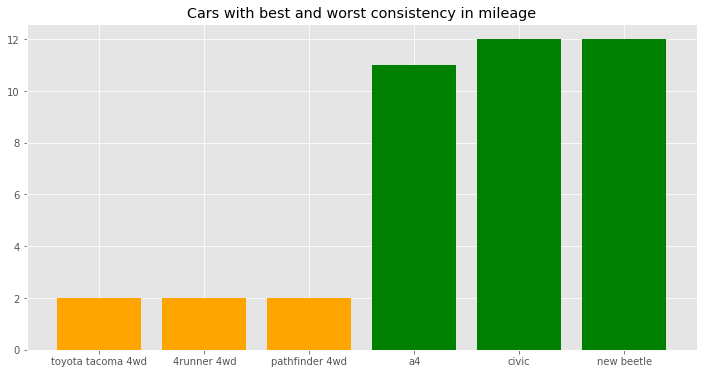

In [542]:
dfDiff = dfDiff.sort_values(by="mileage difference")
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
plt.title("Cars with best and worst consistency in mileage")
plt.bar(dfDiff["model"], dfDiff["mileage difference"], color = ("orange", "orange", "orange", "green", "green", "green"))
plt.show()

* ***Toyota Tacoma, 4runner4wd* and *TPathfinder* have lowest difference. We can say that these cars provide a more consistent performace.**
* **Where as *Civic* and *New Beetle* have highest difference, so these cars may not provide a consistent performance.**

## 5. Compare average mileage of different Transmission types

In [543]:
trans = df["trans"].unique()
trans

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [544]:
dfTrans = pd.DataFrame(columns=["transmission type", "mean city mileage", "mean highway mileage"])
for car_trans in trans:
    count = 0
    total_city = 0
    total_highway = 0
    
    for i in range(234):
        
        if df["trans"].iloc[i] == car_trans:
            city = df["cty"].iloc[i]
            highway = df["hwy"].iloc[i]
            total_city = total_city + city
            total_highway = total_highway + highway
            count = count + 1
    
    mean_city = total_city / count
    mean_highway = total_highway / count
    
    dfTrans = dfTrans.append({"transmission type":car_trans,"mean city mileage":mean_city, "mean highway mileage":mean_highway},ignore_index=True)              

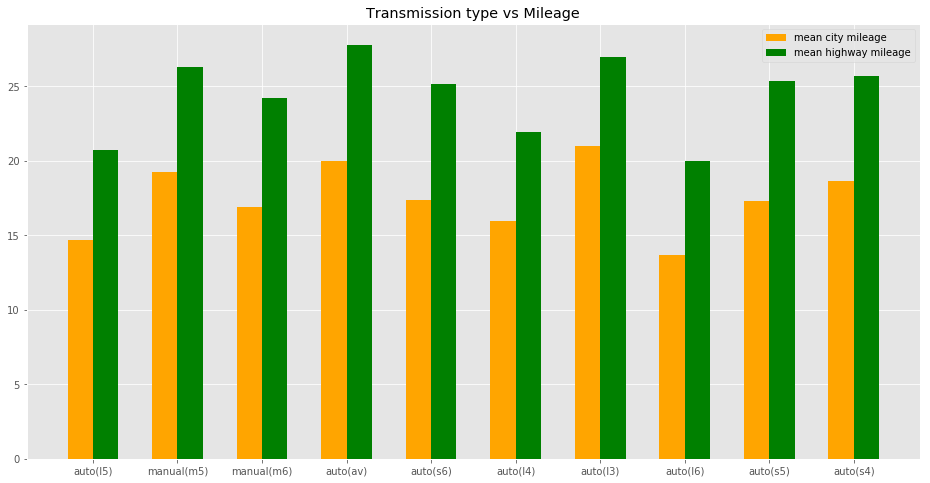

In [545]:
# Referred to matplotlib documentation for subplots usage

N = len(dfTrans)

fig, ax = plt.subplots(figsize=(16,8))
plt.title("Transmission type vs Mileage")
plt.style.use("ggplot")
indices = np.arange(N)
width = 0.30
p1 = ax.bar(indices, dfTrans["mean city mileage"], width=width, color = "orange")
p2 = ax.bar(indices+width, dfTrans["mean highway mileage"], width=width, color = "green")

ax.set_xticks(indices + width / 2)
ax.set_xticklabels(trans)
ax.legend((p1[0], p2[0]), ('mean city mileage', 'mean highway mileage'))
ax.autoscale_view()

plt.show()

**We can observe that :**
* ***auto(av)* has highest highway mileage**
* ***auto(l3)* has highest better city mileage**
* ***auto(l6)* has lowest both city and highway mileages**


## 6. Year-wise analysis

In [400]:
df["year"].unique()

array([1999, 2008], dtype=int64)

In [401]:
df.head(2)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [402]:
cars_old = pd.DataFrame(columns=["disp","cyl","trans","city","hwy","size"])
cars_new = pd.DataFrame(columns=["disp","cyl","trans","city","hwy","size"])

for i in range(234):
    
    if df["year"].iloc[i] == 1999:
        disp = df["displ"].iloc[i]
        cyl = df["cyl"].iloc[i]
        trans = df["trans"].iloc[i]
        city = df["cty"].iloc[i]
        hwy = df["hwy"].iloc[i]
        size = df["class"].iloc[i]
        
        cars_old = cars_old.append({"disp":disp, "cyl":cyl, "trans":trans, "city":city, "hwy":hwy, "size":size},ignore_index=True)
        
    if df["year"].iloc[i] == 2008:
        disp = df["displ"].iloc[i]
        cyl = df["cyl"].iloc[i]
        trans = df["trans"].iloc[i]
        city = df["cty"].iloc[i]
        hwy = df["hwy"].iloc[i]
        size = df["class"].iloc[i]
        
        cars_new = cars_new.append({"disp":disp, "cyl":cyl, "trans":trans, "city":city, "hwy":hwy, "size":size},ignore_index=True)
        
        

In [403]:
print(len(cars_new))
print(len(cars_old))
cars_new.head()

117
117


,disp,cyl,trans,city,hwy,size
0,2.0,4,manual(m6),20,31,compact
1,2.0,4,auto(av),21,30,compact
2,3.1,6,auto(av),18,27,compact
3,2.0,4,manual(m6),20,28,compact
4,2.0,4,auto(s6),19,27,compact


### 6.1 Highway and City mileage

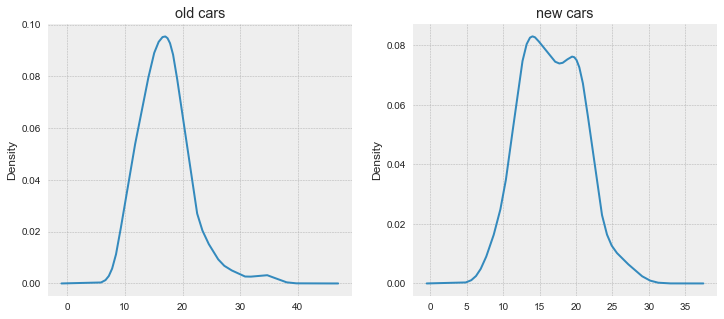

In [560]:
# Read about density plots in the book

plt.figure(figsize=(12,5))
plt.style.use("bmh")
plt.subplot(1,2,1)
cars_old["city"].plot.density(title="old cars")
plt.subplot(1,2,2)
cars_new["city"].plot.density(title="new cars")

plt.show()

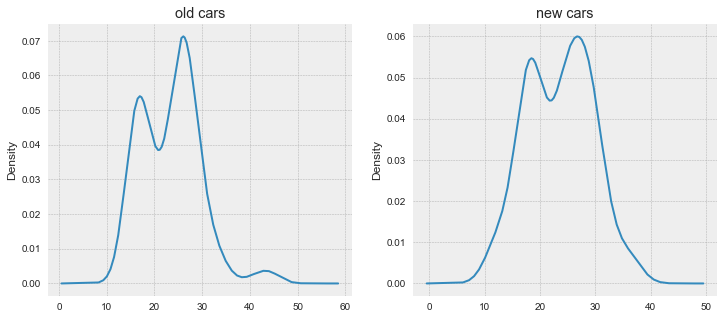

In [561]:
fig = plt.figure(figsize=(12,5))
plt.style.use("bmh")
plt.subplot(1,2,1)
cars_old["hwy"].plot.density(title="old cars")
plt.subplot(1,2,2)
cars_new["hwy"].plot.density(title="new cars")

plt.show()

### 6.2 Vehicle class

In [553]:
x = df["class"].unique()
x     

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

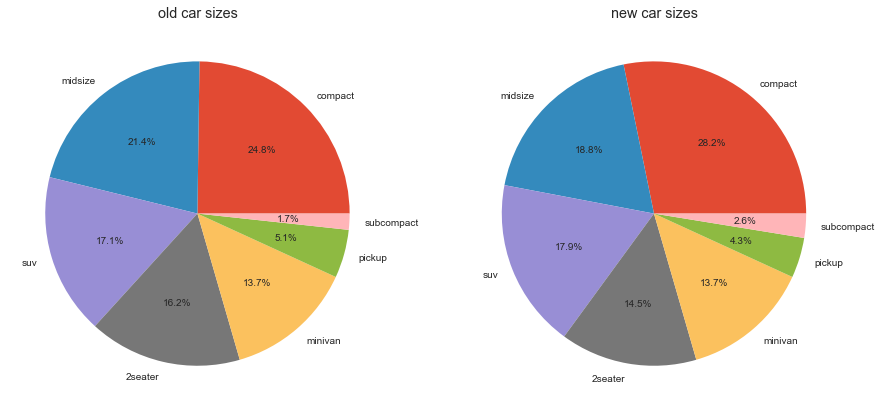

In [554]:
# Referred matplotlib docs for autopct

fig = plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title("old car sizes")
plt.style.use("ggplot")
plt.pie(cars_old["size"].value_counts(), autopct="%1.1f%%", labels=x)

plt.subplot(1,2,2)
plt.title("new car sizes")
plt.pie(cars_new["size"].value_counts(), autopct="%1.1f%%", labels=x)
plt.show()

* **There was slight increase in *compact*, *SUV* and *subcompact* cars in 2008 as compared to 1999.**

### 6.3 Transmission

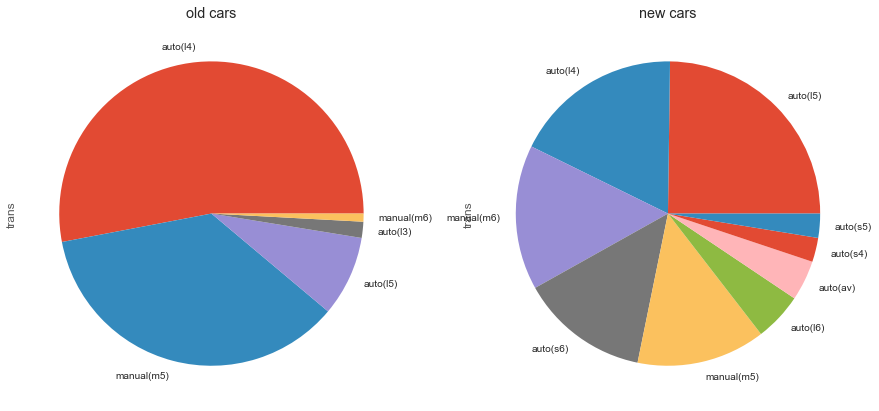

In [555]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
cars_old["trans"].value_counts().plot(kind="pie", title="old cars")
plt.subplot(1,2,2)
cars_new["trans"].value_counts().plot(kind="pie", title="new cars")

plt.show()

* Only ***5*** types of transmissions were available in 1999, where as in 2008 ***9*** types were available.
* **auto(l4)** and **manual(m5)** dominated the market in 1999
* **auto(l5)** and **manual(m6)** both took over *almost half* of **auto(l4)** and **manual(m5)** respectively in 2008.

### 6.4 Displacement

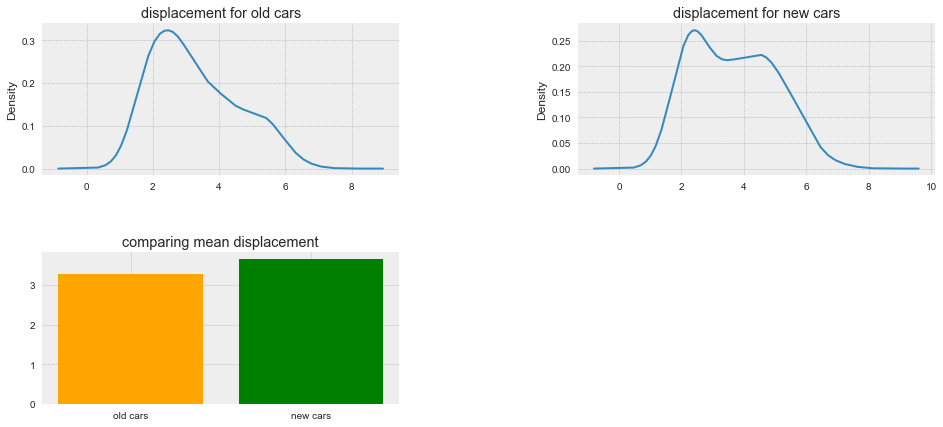

In [559]:
# read about subplots_adjust() in the book

mean1 = cars_new["disp"].mean()
mean2 = cars_old["disp"].mean()

plt.figure(figsize=(16,7))
plt.style.use("bmh")
plt.subplot(2,2,1)
plt.title("displacement for old cars")
cars_old["disp"].plot(kind="kde")

plt.subplot(2,2,2)
plt.title("displacement for new cars")
cars_new["disp"].plot(kind="kde")


plt.subplot(2,2,3)
plt.title("comparing mean displacement")
plt.bar(x=([0,1]),height=([mean2,mean1]), tick_label=["old cars", "new cars"], color=("orange","green"))
#pd.DataFrame([mean1,mean2]).plot(kind="bar")
plt.subplots_adjust(wspace=0.5, hspace=0.5)

* **Displacement increased *slightly* in new cars**

### 6.5 Cylinders

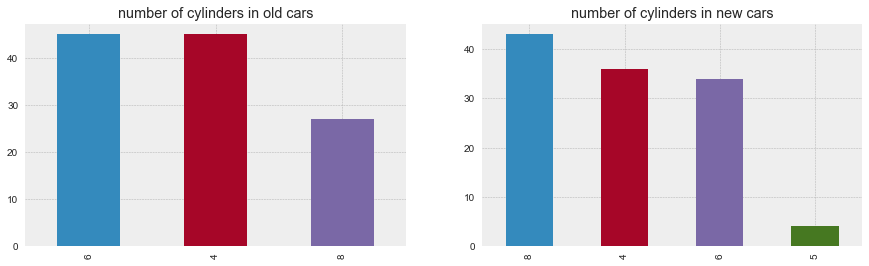

In [562]:
plt.figure(figsize=(15,9))
plt.style.use("bmh")
plt.subplot(2,2,1)
plt.title("number of cylinders in old cars")
cars_old["cyl"].value_counts().plot(kind="bar")

plt.subplot(2,2,2)
plt.title("number of cylinders in new cars")
cars_new["cyl"].value_counts().plot(kind="bar")

plt.show()

* New cars have more ***8*** cylindered engines.
* ***5*** cylindered engines introduced in new cars.